<a href="https://colab.research.google.com/github/JorgeZarama/DeepLearning/blob/main/07MAIR_VC02_VC03_Introducci%C3%B3n_a_Deep_Learning_Practica_Colab_Resuelto_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

In [1]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.10.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.42
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.1
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy

Hola voy a ejecutar el comando ```!pip freeze``` para cotillear a Google Colab

In [1]:
#Importemos TensorFlow 2.X y Numpy
import numpy as np
import tensorflow as tf
tf.__version__

'2.14.0'

#### **- Cargando el conjunto de datos**

In [2]:
# Importamos el dataset MNIST y cargamos los datos
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### **- Inspeccionando el conjunto de datos**

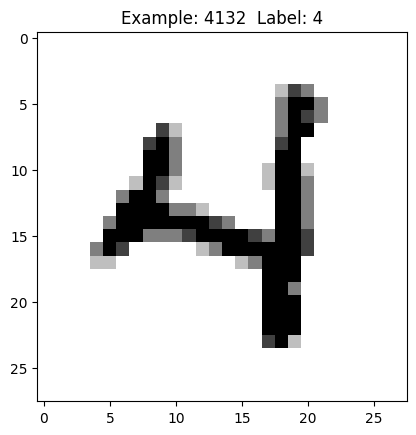

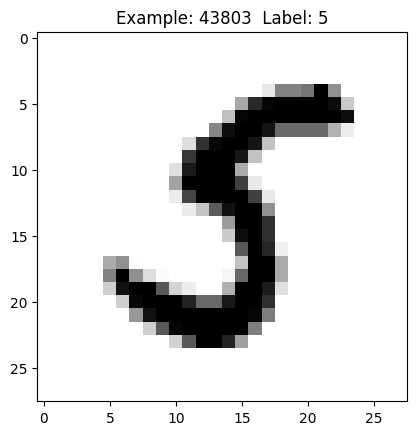

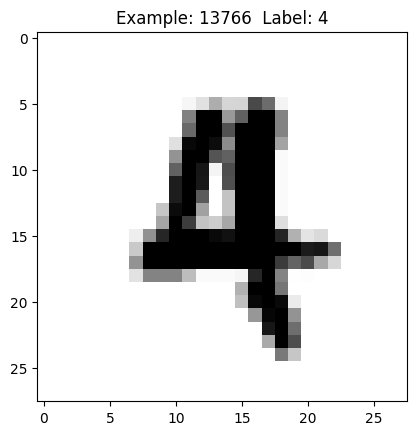

In [3]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = x_train[num,:,:]
  # Seleccionar el target num de mnist.train.labels
  label = y_train[num]
  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))
display_digit(np.random.randint(0, x_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [4]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_te = x_train / 255.0, x_test / 255.0 #Cambio al rango 0-1 -> Disminuyo CC
y_train = to_categorical(y_train, num_classes=10) #One-hot encoding para minimizar error
print(y_train.shape)
y_te = to_categorical(y_test, num_classes=10)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
print(y_tr.shape)
# print(y_tr[0])

(60000, 10)
(54000, 10)


In [5]:
print(y_tr[37].shape)
print(y_tr[37])

(10,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print(y_tr[37].argmax(axis=0))

2


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [7]:
# Voy a necesitar importar una serie de modulos para programar mi red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# Vamos a codificar la topología de nuestra primera red neuronal!!!
model = Sequential()
model.add(Flatten())
model.add(Dense(512, input_shape=(28*28,), activation="relu"))
model.add(Dense(10, activation="softmax")) #Capa salida -> Mismo número de neuronas que de clases objetivo

# Ahí tenemos nuestro primer MLP con una única capa oculta de 512 neuronas

In [8]:
#Traigamos nuestro optimizador
from tensorflow.keras.optimizers import SGD
# Ahora que tengo definida la arquitectura, la compilo
optimizer =  optimizer=SGD(0.005)


In [9]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [10]:
# Por fin podemos entrenar nuestra primera red neuronal
print("[INFO]: Entrenando red neuronal...")
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=50, batch_size=128)

[INFO]: Entrenando red neuronal...
Epoch 1/50
422/422 [==============================] - 10s 11ms/step - loss: 1.5237 - accuracy: 0.6499 - val_loss: 1.0044 - val_accuracy: 0.8040
Epoch 2/50
422/422 [==============================] - 3s 7ms/step - loss: 0.8032 - accuracy: 0.8322 - val_loss: 0.6712 - val_accuracy: 0.8510
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 0.6010 - accuracy: 0.8602 - val_loss: 0.5462 - val_accuracy: 0.8680
Epoch 4/50
422/422 [==============================] - 3s 6ms/step - loss: 0.5116 - accuracy: 0.8739 - val_loss: 0.4799 - val_accuracy: 0.8775
Epoch 5/50
422/422 [==============================] - 3s 8ms/step - loss: 0.4604 - accuracy: 0.8822 - val_loss: 0.4383 - val_accuracy: 0.8853
Epoch 6/50
422/422 [==============================] - 3s 6ms/step - loss: 0.4264 - accuracy: 0.8887 - val_loss: 0.4091 - val_accuracy: 0.8907
Epoch 7/50
422/422 [==============================] - 3s 6ms/step - loss: 0.4020 - accuracy: 0.8933 - val_loss:

#### **- Observando el proceso de entrenamiento para tomar decisiones**

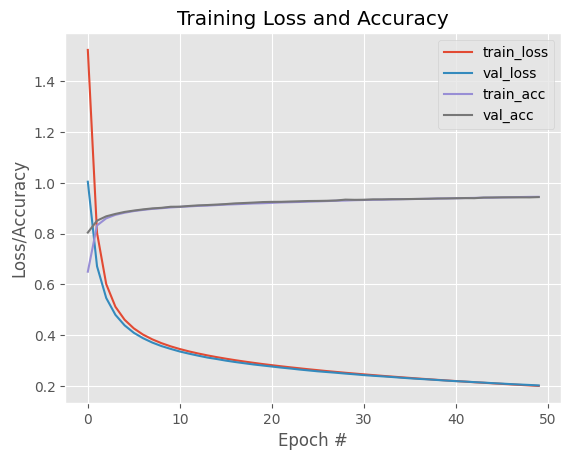

In [11]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [12]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=128)
print(y_te[0])
print(predictions[0])
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

[INFO]: Evaluando red neuronal...
79/79 [==============================] - 0s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.5800951e-04 2.1866752e-07 2.6085970e-04 1.6278626e-03 1.6269864e-06
 5.9490812e-05 2.5685511e-08 9.9729711e-01 2.4287810e-05 5.7052332e-04]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.91      0.92       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94 

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [14]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


#### **- Inspeccionando el conjunto de datos**

In [15]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5248]]
)
decoded

550378/550378 [==============================] - 0s 0us/step


'? ? oil corp said it has completed a ? well on its ? ? in jefferson davis ? la which is currently producing at a rate of 1 1 mln cubic feet of gas and 40 barrels of condensate daily the company said it has a 20 pct working interest in the well which is flowing from lower ? ? sand ? between 10 104 and 10 110 feet additional ? but possibly productive zones exist behind the pipe it added it said the remaining owners are privately held petroleum companies reuter 3'

#### **- Acondicionando el conjunto de datos**

In [16]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [17]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [18]:
print(x_test[3])

[0. 1. 1. ... 0. 0. 0.]


In [19]:
# Convertimos nuestros labels (categoría reseña) a one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(training_labels)
y_test = to_categorical(testing_labels)
print(y_train.shape)
print(y_test.shape)

(8982, 46)
(2246, 46)


In [20]:
print(y_test[3])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Vamos a codificar la topología de nuestro MLP
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(WORD_LIMIT,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [22]:
# Ahora que tengo definida la arquitectura, la compilo
model.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [23]:
# A entrenar nuestra red neuronal sea dicho!
H = model.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 6ms/step - loss: 1.4624 - accuracy: 0.6793 - val_loss: 1.0000 - val_accuracy: 0.7913
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 0.5583 - accuracy: 0.8781 - val_loss: 0.8659 - val_accuracy: 0.8108
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 0.2675 - accuracy: 0.9421 - val_loss: 0.9031 - val_accuracy: 0.8041
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1940 - accuracy: 0.9530 - val_loss: 0.9155 - val_accuracy: 0.7980
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1576 - accuracy: 0.9578 - val_loss: 0.9168 - val_accuracy: 0.8080
Epoch 6/20
225/225 [==============================] - 1s 5ms/step - loss: 0.1364 - accuracy: 0.9588 - val_loss: 0.9745 - val_accuracy: 0.8063
Epoch 7/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1280 - accuracy: 0.9589 - val_loss: 0.9920 - val_accuracy: 0.8030
Epoch 

#### **- Observando el proceso de entrenamiento para tomar decisiones**

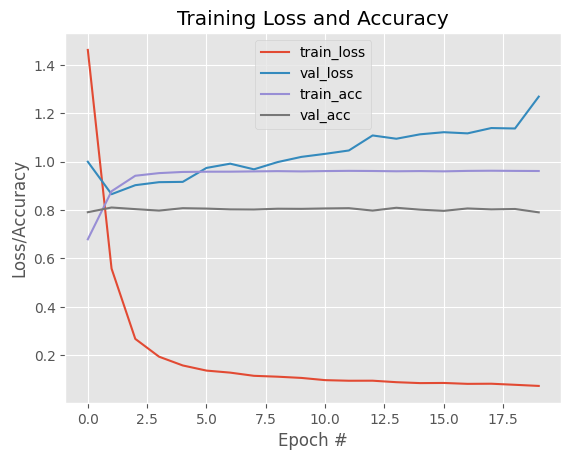

In [24]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [25]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model.predict(x_test)
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.3391 - accuracy: 0.7956
Loss 1.3391343355178833, accuracy 0.7956367135047913


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
# Vamos a codificar la topología de nuestro MLP
model_reg = Sequential()
model_reg.add(Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(WORD_LIMIT,)))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_reg.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [43]:
# Ahora que tengo definida la arquitectura, la compilo
model_reg.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [44]:
# A entrenar nuestra red neuronal sea dicho!
H = model_reg.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 1.6926 - accuracy: 0.6775 - val_loss: 1.2545 - val_accuracy: 0.7752
Epoch 2/20
225/225 [==============================] - 2s 7ms/step - loss: 0.9514 - accuracy: 0.8466 - val_loss: 1.2072 - val_accuracy: 0.7980
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 0.7606 - accuracy: 0.9010 - val_loss: 1.1965 - val_accuracy: 0.7963
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 0.6620 - accuracy: 0.9262 - val_loss: 1.2023 - val_accuracy: 0.8041
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 0.6218 - accuracy: 0.9358 - val_loss: 1.2113 - val_accuracy: 0.8069
Epoch 6/20
225/225 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.9339 - val_loss: 1.2434 - val_accuracy: 0.7958
Epoch 7/20
225/225 [==============================] - 1s 4ms/step - loss: 0.5779 - accuracy: 0.9421 - val_loss: 1.2165 - val_accuracy: 0.8052
Epoch 

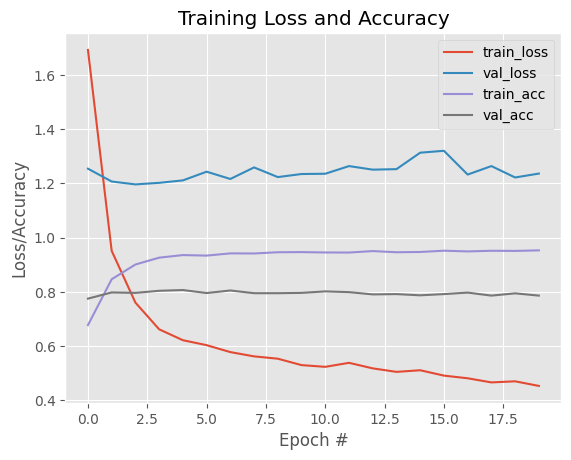

In [45]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [30]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_reg.predict(x_test)
loss, accuracy = model_reg.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 4ms/step - loss: 1.4787 - accuracy: 0.7605
Loss 1.478725552558899, accuracy 0.7604630589485168


#### **- Dropout**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Vamos a codificar la topología de nuestro MLP
model_drop = Sequential()
model_drop.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))#porcentaje de neuronas a desactivar recomendado 0.25 a 0.5
model_drop.add(Dense(64,activation='relu'))
#model_drop.add(Dropout(0.5))
model_drop.add(Dropout(0.75))
model_drop.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [50]:
# Ahora que tengo definida la arquitectura, la compilo
model_drop.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [51]:
# A entrenar nuestra red neuronal sea dicho!
H = model_drop.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 3s 7ms/step - loss: 2.5693 - accuracy: 0.3763 - val_loss: 1.7105 - val_accuracy: 0.5431
Epoch 2/20
225/225 [==============================] - 1s 5ms/step - loss: 1.8913 - accuracy: 0.5372 - val_loss: 1.5199 - val_accuracy: 0.6650
Epoch 3/20
225/225 [==============================] - 1s 5ms/step - loss: 1.7104 - accuracy: 0.5822 - val_loss: 1.4129 - val_accuracy: 0.7006
Epoch 4/20
225/225 [==============================] - 1s 5ms/step - loss: 1.6047 - accuracy: 0.6029 - val_loss: 1.3683 - val_accuracy: 0.7073
Epoch 5/20
225/225 [==============================] - 1s 5ms/step - loss: 1.5119 - accuracy: 0.6316 - val_loss: 1.3280 - val_accuracy: 0.7095
Epoch 6/20
225/225 [==============================] - 1s 5ms/step - loss: 1.4487 - accuracy: 0.6450 - val_loss: 1.3109 - val_accuracy: 0.7134
Epoch 7/20
225/225 [==============================] - 1s 5ms/step - loss: 1.3957 - accuracy: 0.6575 - val_loss: 1.2729 - val_accuracy: 0.7156
Epoch 

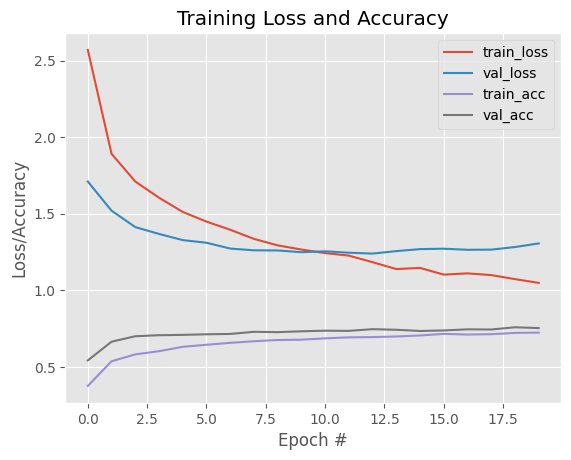

In [52]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# ¿Y si desconectamos mayor porcentaje de neuronas?

In [35]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_drop.predict(x_test)
loss, accuracy = model_drop.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.4312 - accuracy: 0.7346
Loss 1.4311742782592773, accuracy 0.7346393465995789


#### **- Batch Normalization**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [54]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [55]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(x_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 5s 10ms/step - loss: 3.3957 - accuracy: 0.3166 - val_loss: 1.8520 - val_accuracy: 0.5999
Epoch 2/20
225/225 [==============================] - 2s 7ms/step - loss: 2.1196 - accuracy: 0.5516 - val_loss: 1.4656 - val_accuracy: 0.6811
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 1.8085 - accuracy: 0.6025 - val_loss: 1.3777 - val_accuracy: 0.6978
Epoch 4/20
225/225 [==============================] - 2s 7ms/step - loss: 1.6625 - accuracy: 0.6299 - val_loss: 1.3119 - val_accuracy: 0.7084
Epoch 5/20
225/225 [==============================] - 2s 7ms/step - loss: 1.5622 - accuracy: 0.6468 - val_loss: 1.2768 - val_accuracy: 0.7084
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 1.4547 - accuracy: 0.6664 - val_loss: 1.2359 - val_accuracy: 0.7190
Epoch 7/20
225/225 [==============================] - 2s 7ms/step - loss: 1.3910 - accuracy: 0.6757 - val_loss: 1.2083 - val_accuracy: 0.7190
Epoch

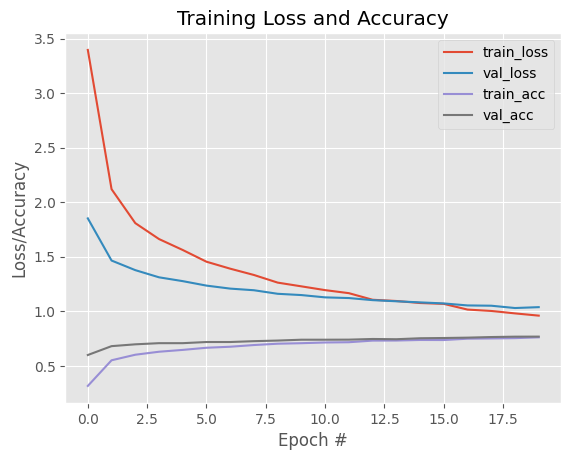

In [56]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [57]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_bn.predict(x_test)
loss, accuracy = model_bn.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
71/71 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.7560
Loss 1.0824488401412964, accuracy 0.7560107111930847
